<a href="https://colab.research.google.com/github/Pratham0181/python-assignments/blob/main/Airline_Customer_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
# import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 200)


from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airline_customer_satisfaction.csv')


In [ ]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [ ]:
duplicates_from_dataset=df.duplicated().sum()
print(f'There are {duplicates_from_dataset} duplicate values in dataset.')

There are 0 duplicate values in dataset.


In [ ]:
df.isnull().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(),inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
categorical = ['Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical = ['Age', 'Flight distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Departure/Arrival time convenient',
              'Ease of Online Booking', 'Checkin service', 'Online Boarding', 'Gate location', 'On-board service',
              'Seat comfort', 'Leg room service', 'Cleanliness', 'Food and drink',
              'Inflight wifi service', 'Inflight entertainment', 'Baggage handling', 'online support', ]

In [ ]:
categorical = ['Customer Type', 'Type of Travel', 'Class', 'satisfaction']
numerical = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
             'Departure/Arrival time convenient', 'Ease of Online booking',
             'Checkin service', 'Online boarding', 'Gate location', 'On-board service',
             'Seat comfort', 'Leg room service', 'Cleanliness', 'Food and drink',
             'Inflight wifi service', 'Inflight entertainment', 'Baggage handling', 'Online support']

# Verify if the columns exist in the DataFrame
print(df.columns)

df[numerical].describe()

Index(['satisfaction', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Departure/Arrival time convenient,Ease of Online booking,Checkin service,Online boarding,Gate location,On-board service,Seat comfort,Leg room service,Cleanliness,Food and drink,Inflight wifi service,Inflight entertainment,Baggage handling,Online support
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,14.713713,15.045465,2.990645,3.472105,3.340807,3.352587,2.990422,3.465075,2.838597,3.485902,3.705759,2.851994,3.249130,3.383477,3.695673,3.519703
std,15.119360,1027.115606,38.071126,38.416353,1.527224,1.305560,1.260582,1.298715,1.305970,1.270836,1.392983,1.292226,1.151774,1.443729,1.318818,1.346059,1.156483,1.306511
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,1359.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000
50%,40.000000,1925.000000,0.000000,0.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,51.000000,2544.000000,12.000000,13.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
max,85.000000,6951.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df[categorical].describe()

,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880
unique,2,2,3,2
top,Loyal Customer,Business travel,Business,satisfied
freq,106100,89693,62160,71087


In [ ]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [ ]:
for col in categorical:
    print (f'Value counts of {col} column')
    print(df[col].value_counts(), '\n')

Value counts of Customer Type column
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64 

Value counts of Type of Travel column
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64 

Value counts of Class column
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64 

Value counts of satisfaction column
satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64 



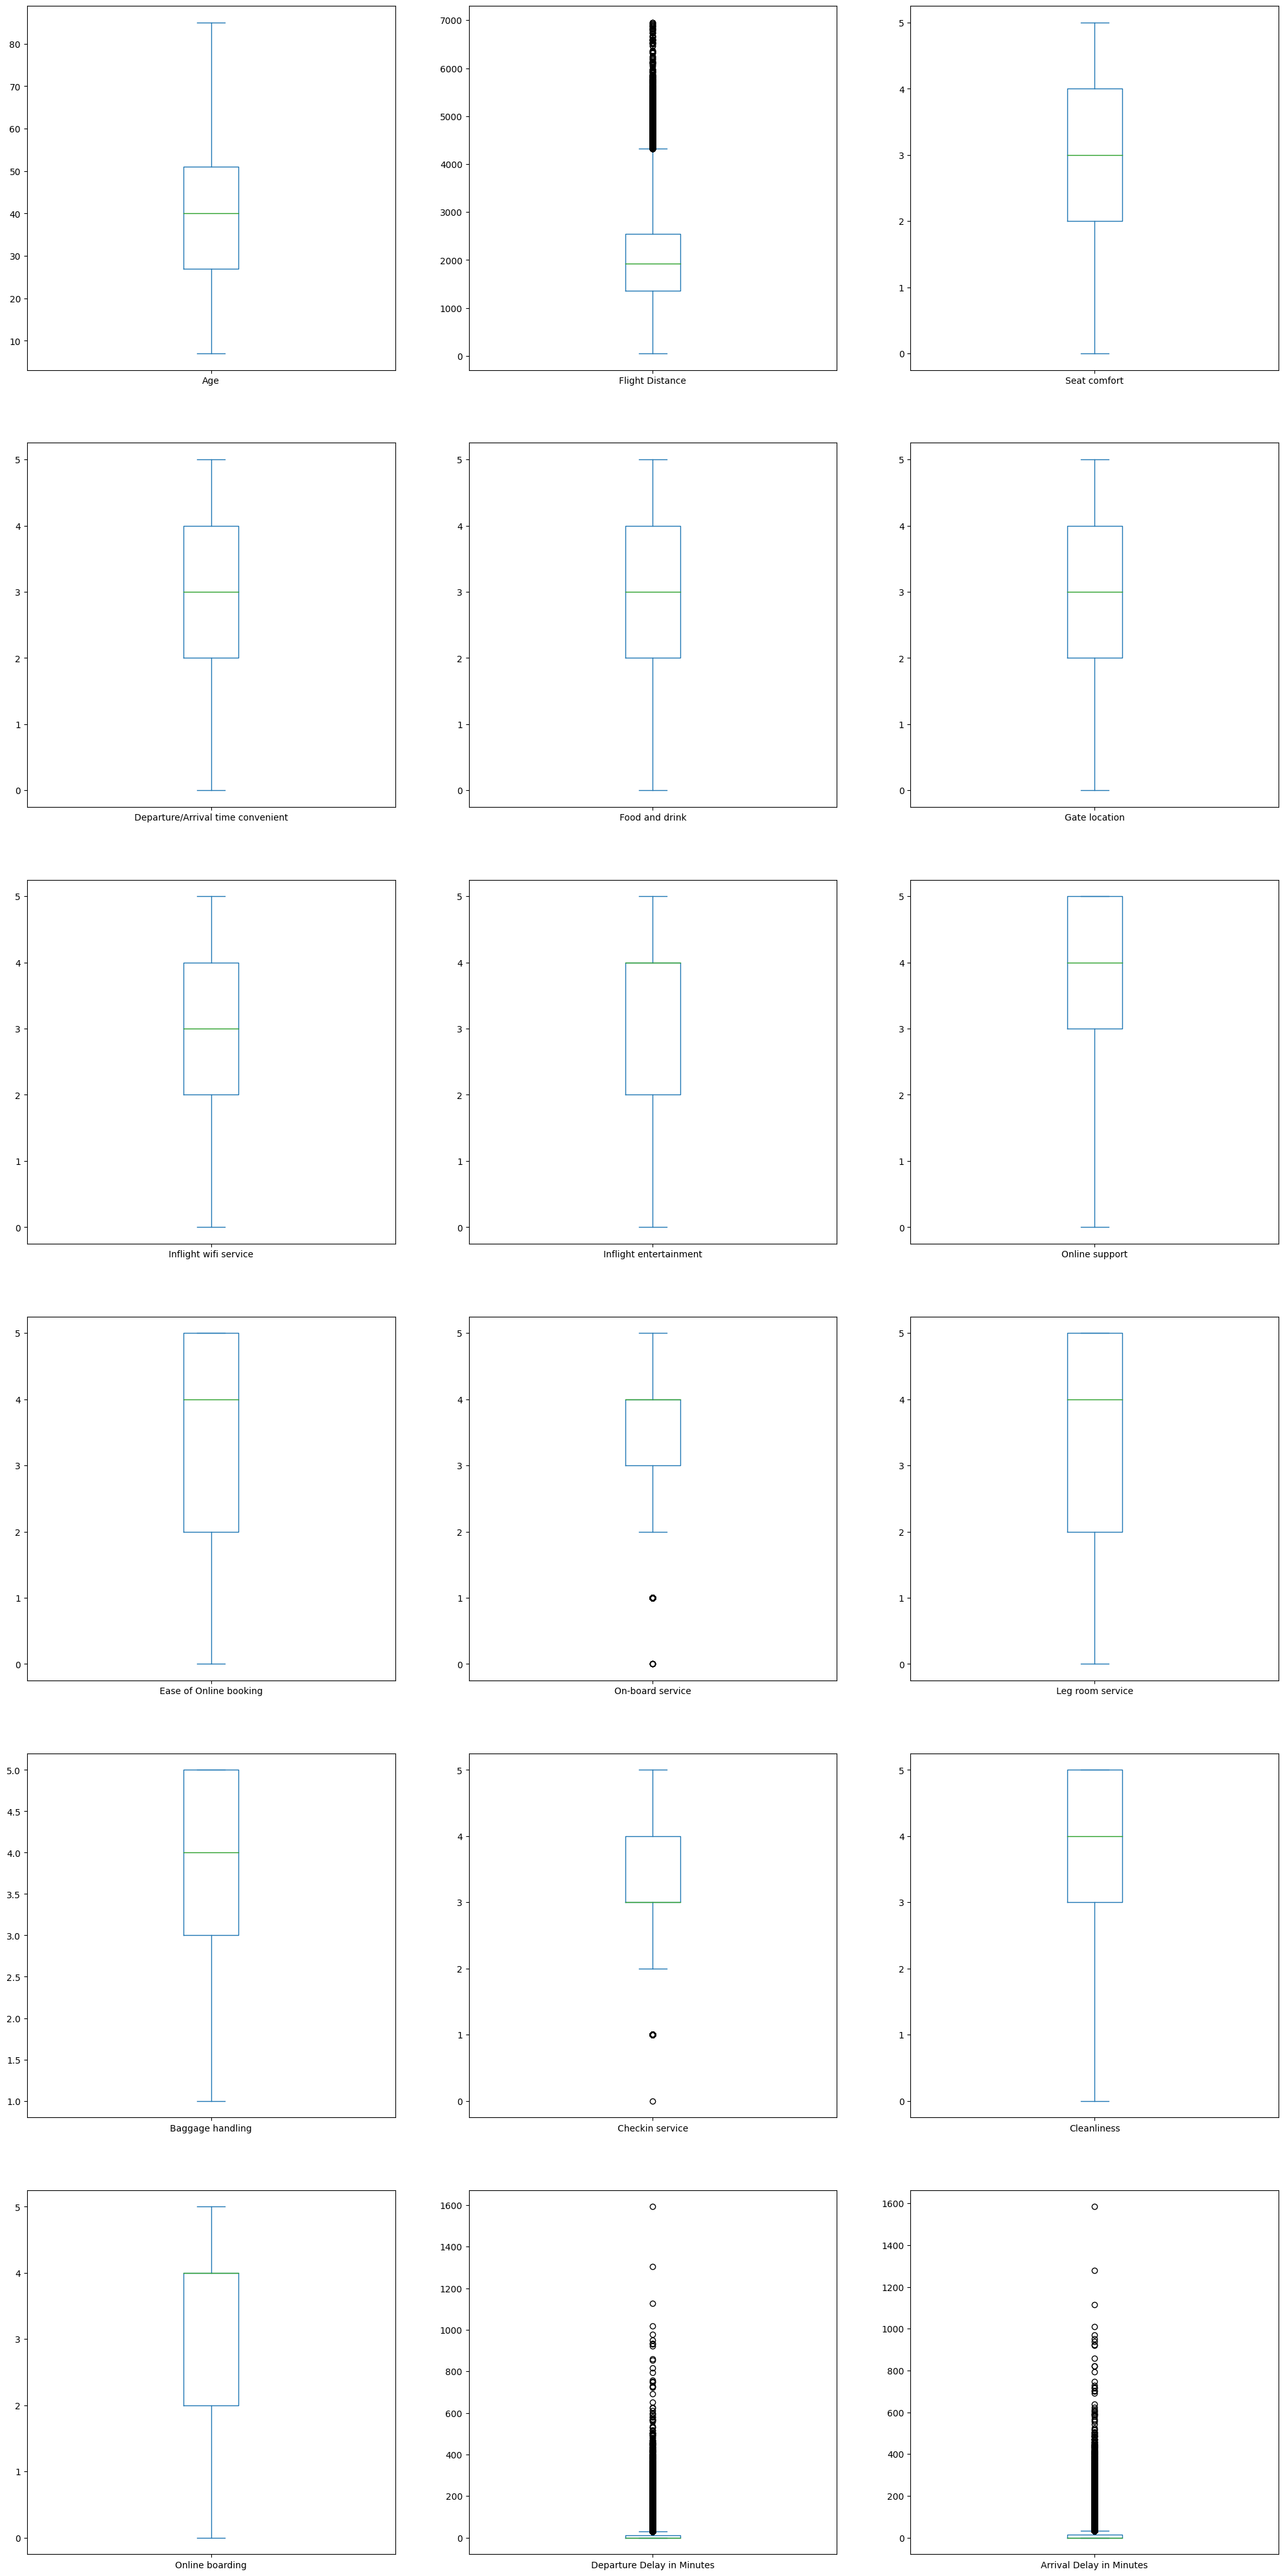

In [ ]:
df.plot(kind = 'box', subplots = True, layout = (7, 3), figsize = (25, 60))
plt.show()

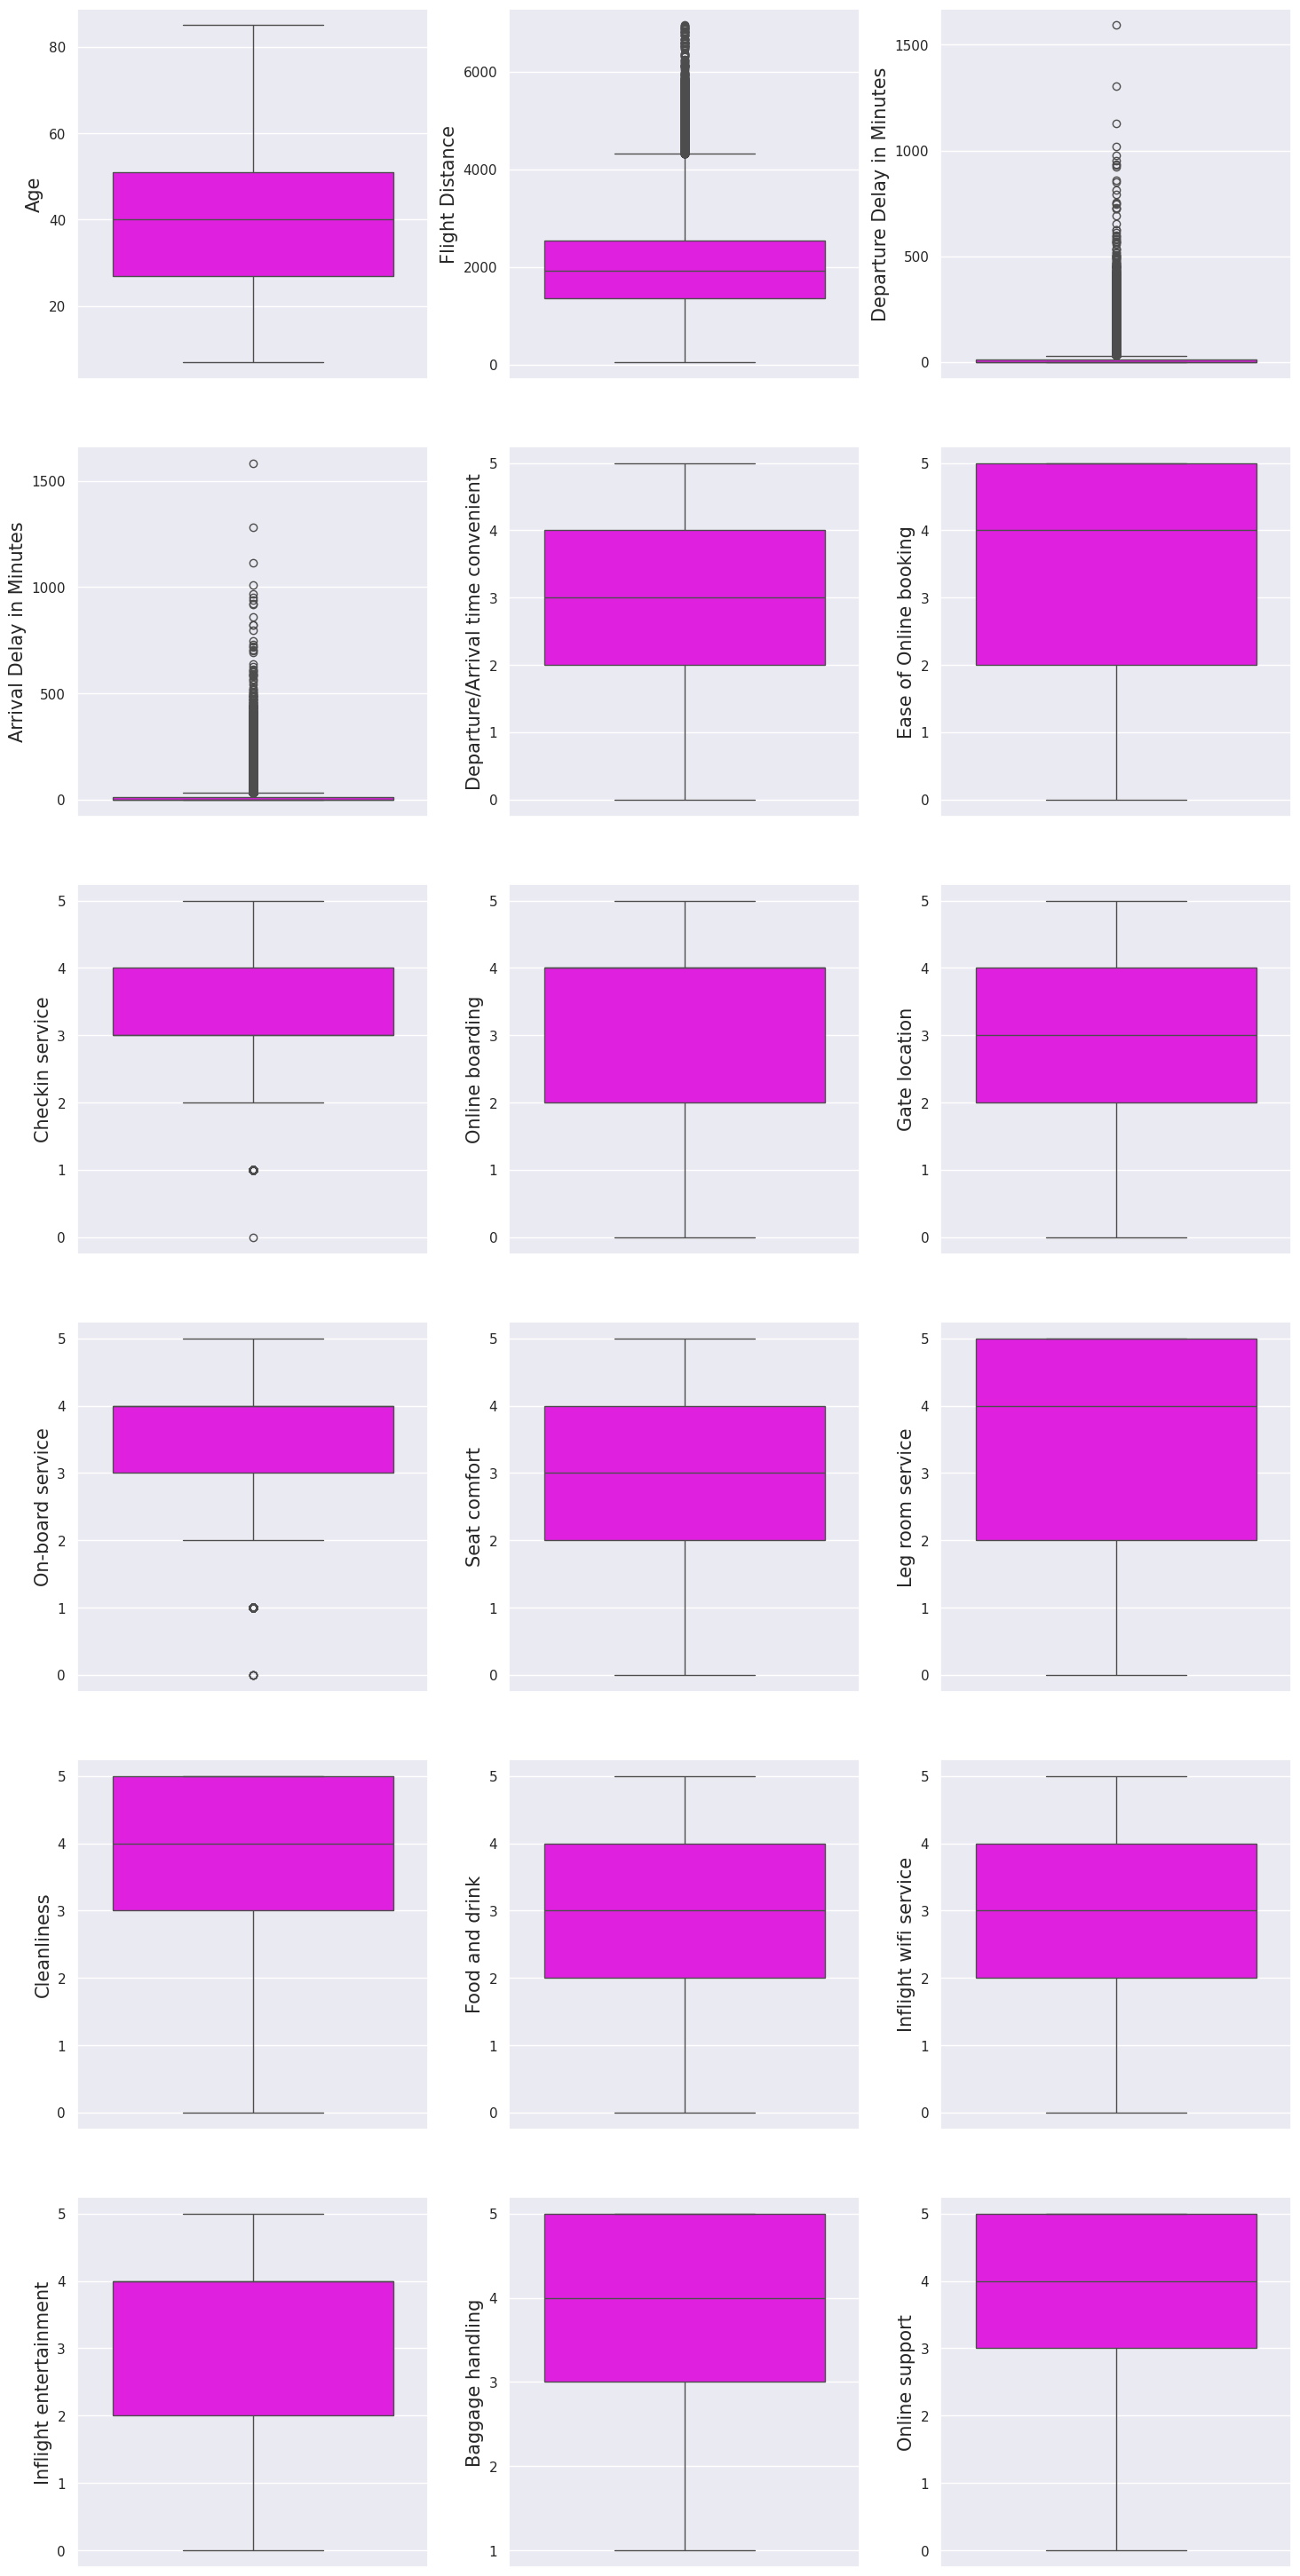

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(6, 3, figsize=(15,30))
fig.tight_layout(pad=3.0)

for f,ax in zip(numerical,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df,y=df[f],color='magenta')

In [ ]:
outlier1 = df['Flight Distance'].max()

df[df['Flight Distance'] == outlier1]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
49083,dissatisfied,disloyal Customer,42,Business travel,Business,6951,2,2,2,5,2,1,1,3,3,4,5,1,4,1,1,25.0


In [ ]:
outlier2 = df['Departure Delay in Minutes'].max()

df[df['Departure Delay in Minutes'] == outlier2]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
9704,dissatisfied,Loyal Customer,47,Personal Travel,Eco,3113,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0


In [ ]:
outlier3 = df['Arrival Delay in Minutes'].max()

df[df['Arrival Delay in Minutes'] == outlier3]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
9704,dissatisfied,Loyal Customer,47,Personal Travel,Eco,3113,2,2,2,3,2,4,2,2,4,4,4,2,3,2,1592,1584.0


In [ ]:
outlier4 = df['Checkin service'].min()

df[df['Checkin service'] == outlier4]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
69563,dissatisfied,Loyal Customer,44,Business travel,Business,1940,4,5,5,5,1,4,0,4,4,3,3,0,1,0,200,233.0


In [ ]:
df['Checkin service'].unique()

array([5, 2, 4, 3, 1, 0])

In [ ]:
non_continues = ['Departure/Arrival time convenient',
              'Ease of Online booking', 'Checkin service', 'Online boarding', 'Gate location', 'On-board service',
              'Seat comfort', 'Leg room service', 'Cleanliness', 'Food and drink',
              'Inflight wifi service', 'Inflight entertainment', 'Baggage handling']
len(non_continues)

13

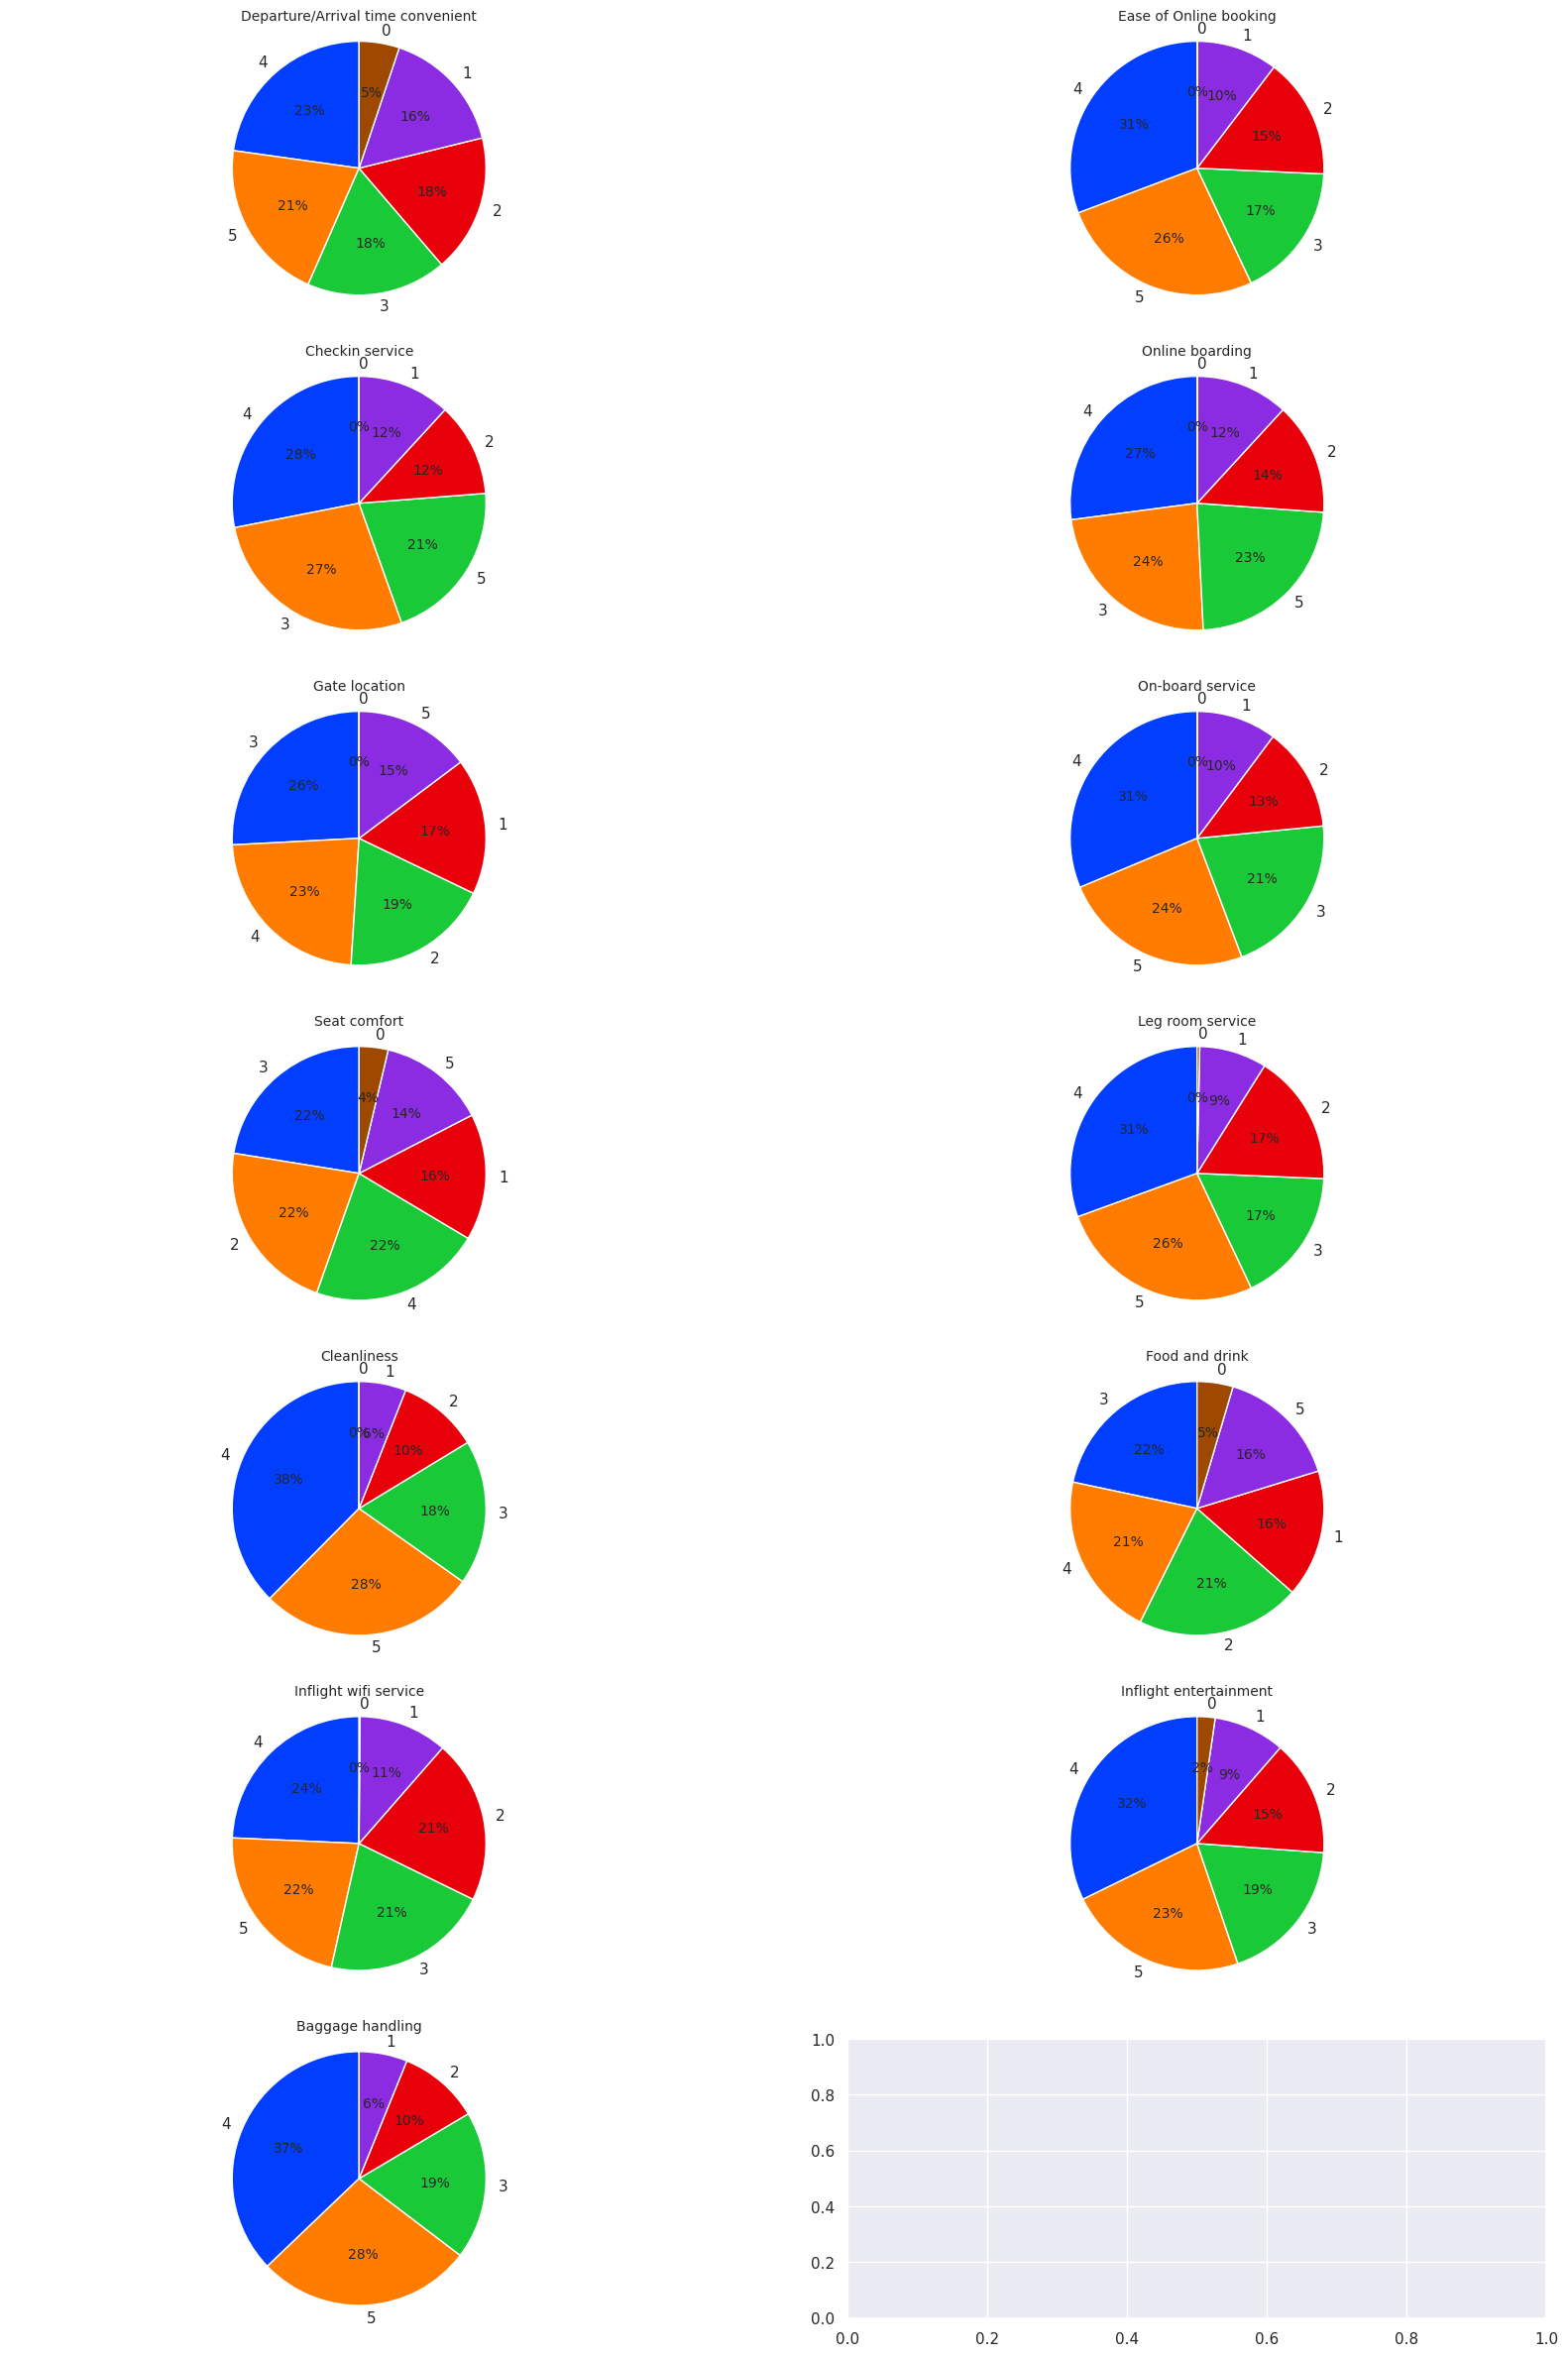

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(7, 2, figsize = (20, 30))
for i, col in enumerate(non_continues):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("bright"),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

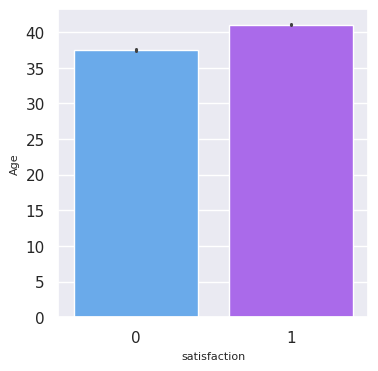

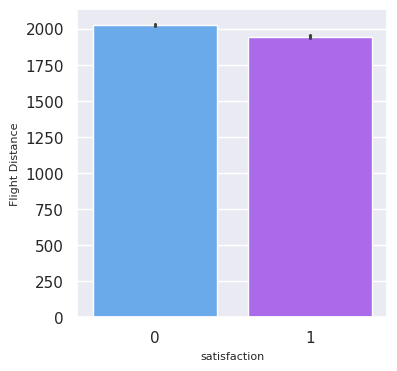

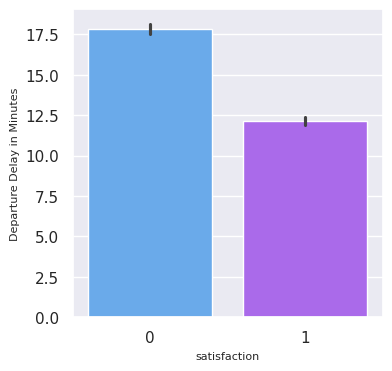

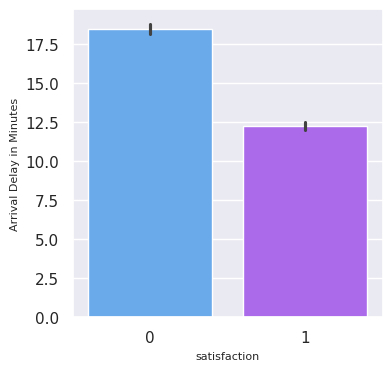

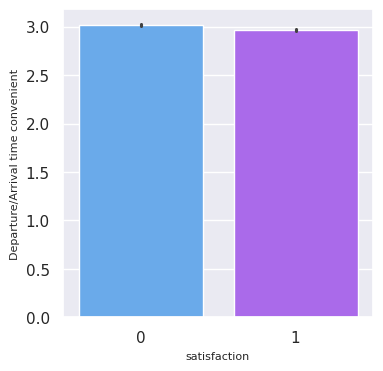

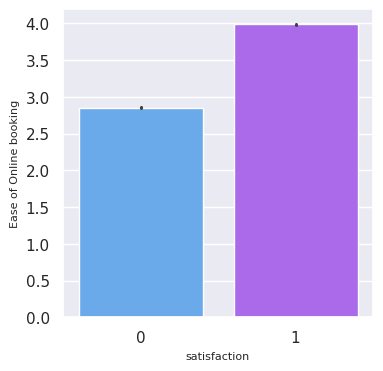

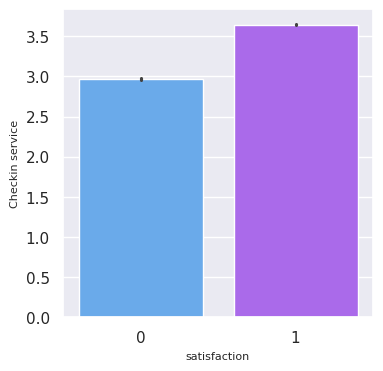

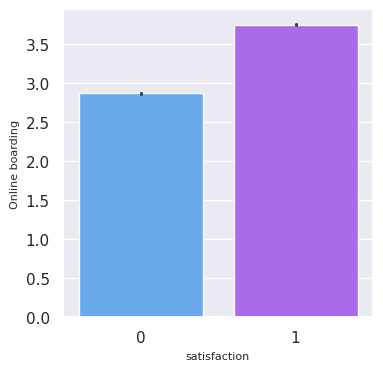

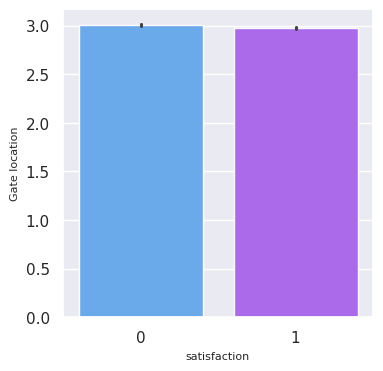

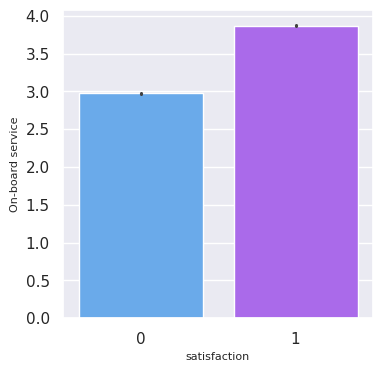

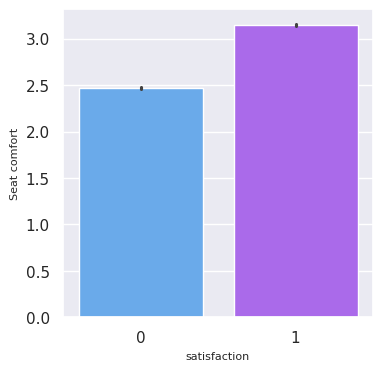

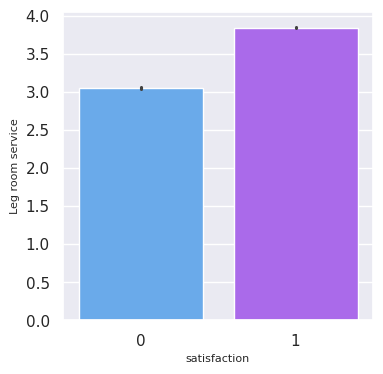

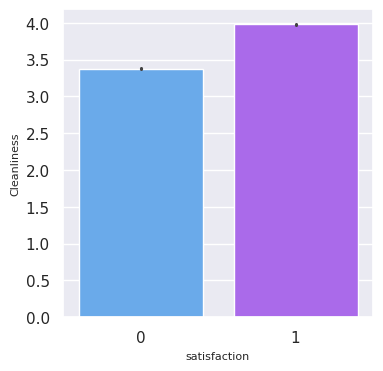

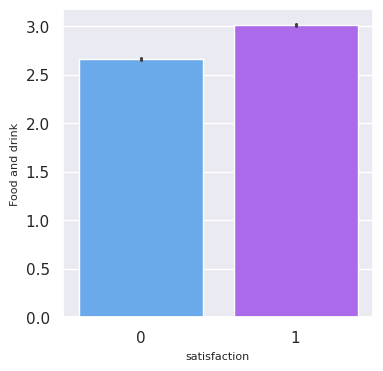

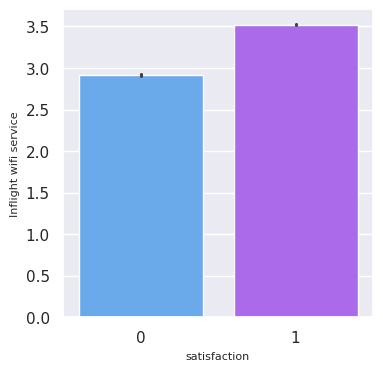

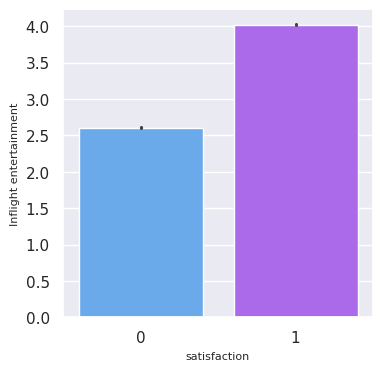

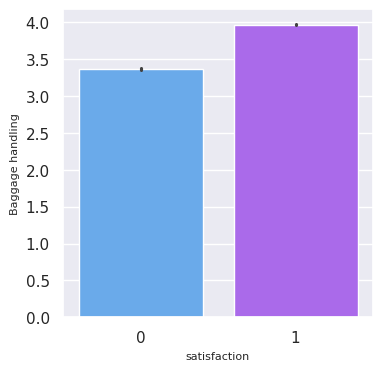

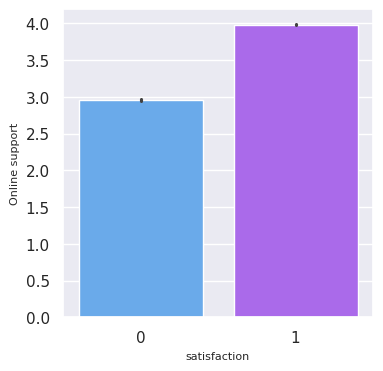

In [ ]:
sns.set(rc={'figure.figsize':(4, 4),
            "font.size":8,
            "axes.titlesize":8,
            "axes.labelsize":8},
             style="darkgrid")
for i in numerical:
    sns.barplot(data=df, x='satisfaction', y=i, palette='cool')
    plt.show()

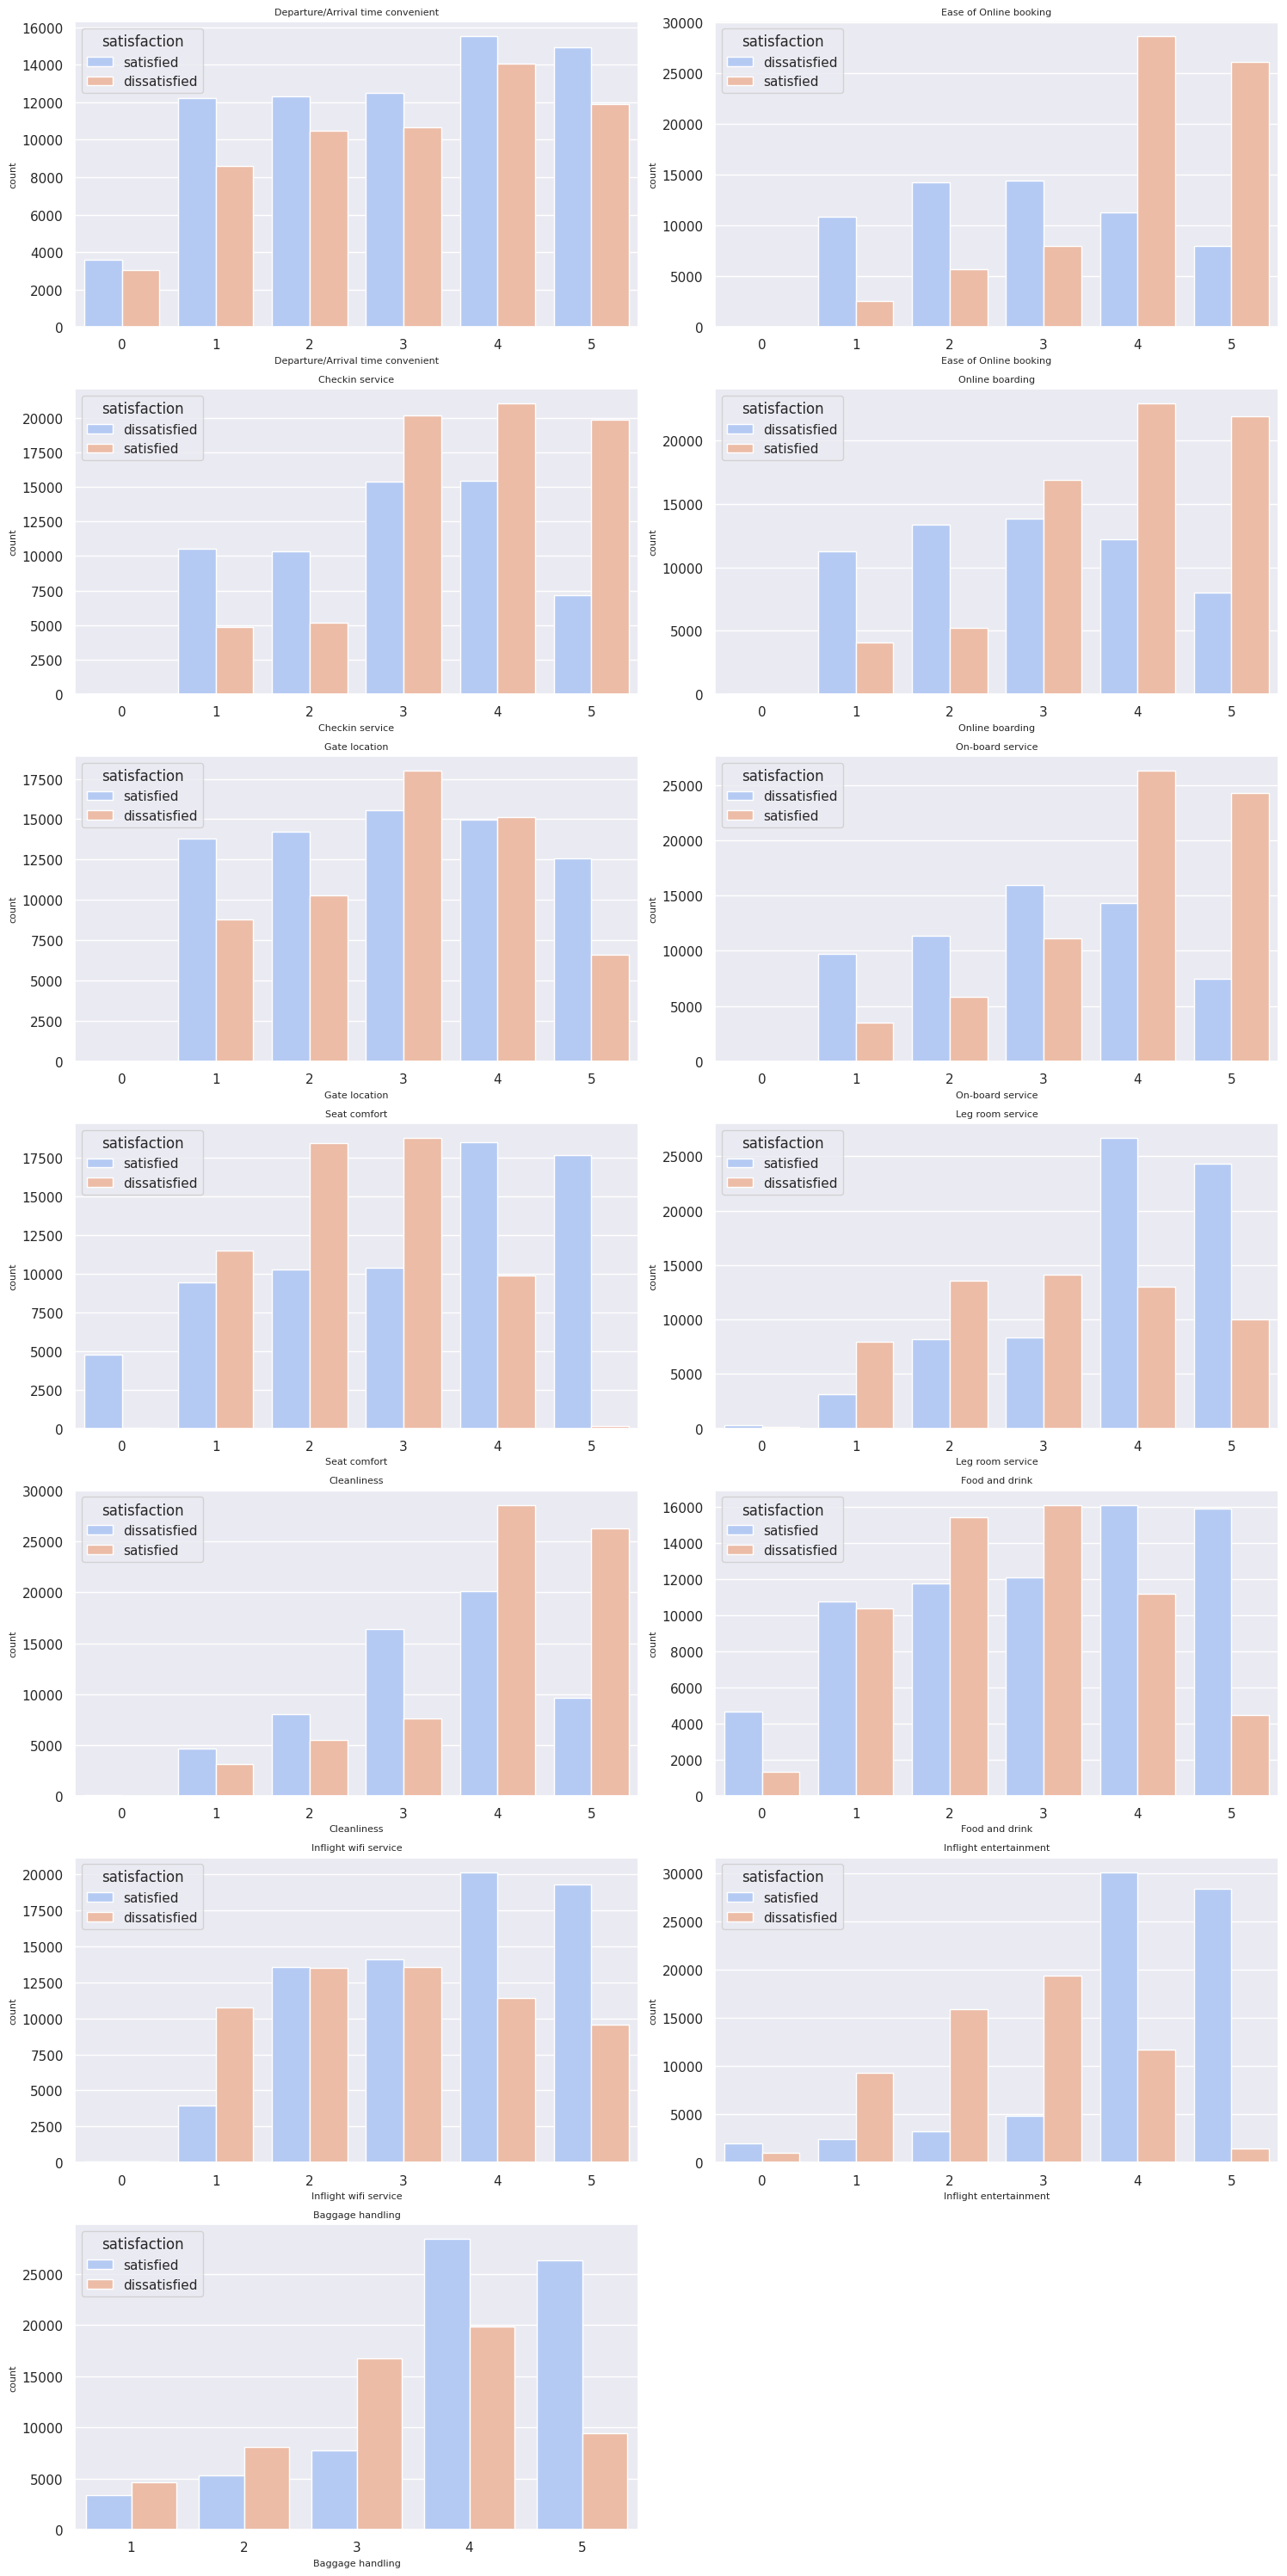

In [ ]:
plt.figure(figsize=(15,30))
for i in range(len(non_continues)):
    plt.subplot(7,2,i+1)
    plt.title(non_continues[i])
    sns.countplot(x=df[non_continues[i]],hue=df['satisfaction'], palette = 'coolwarm')
plt.tight_layout()

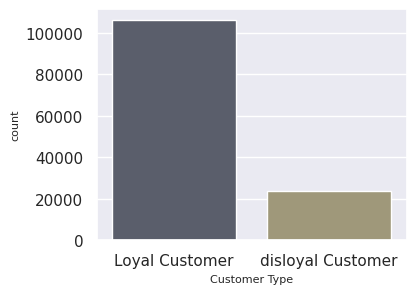

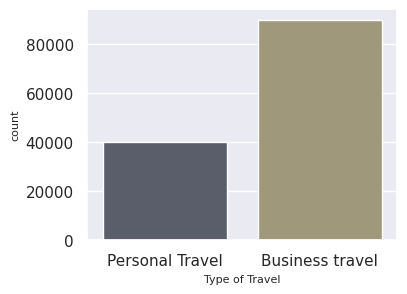

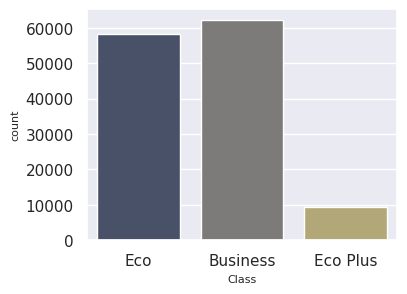

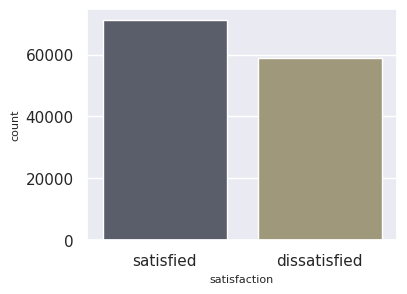

In [ ]:
for col in categorical:
    plt.figure(figsize = (4, 3))
    sns.countplot(x = col, data = df, palette = "cividis")
    plt.show();

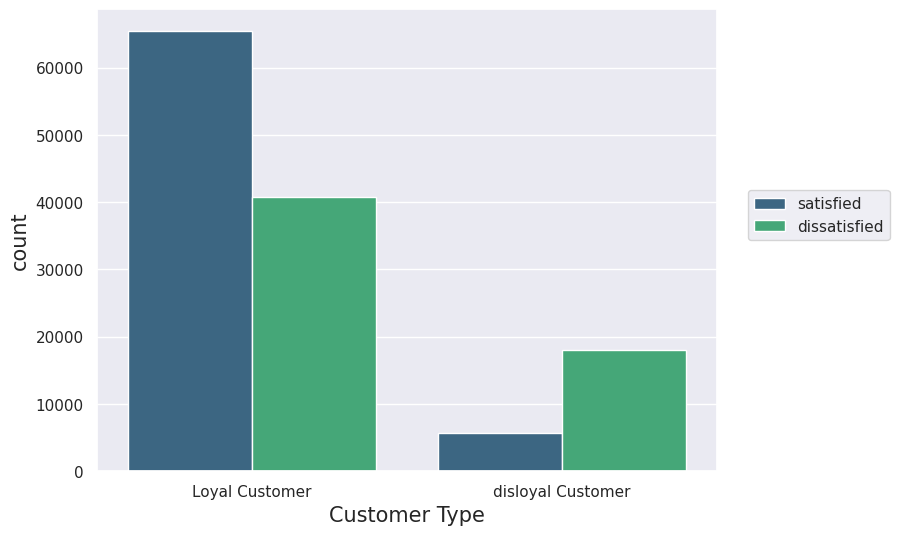

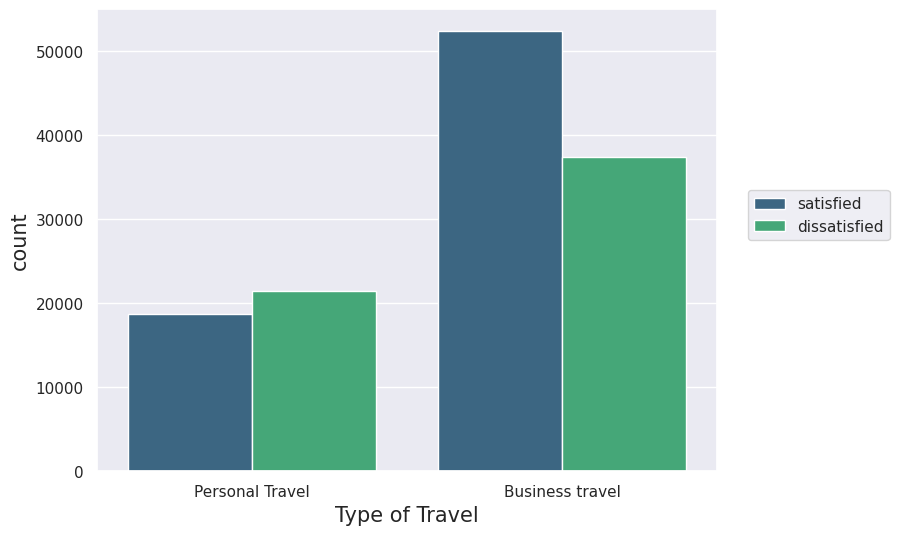

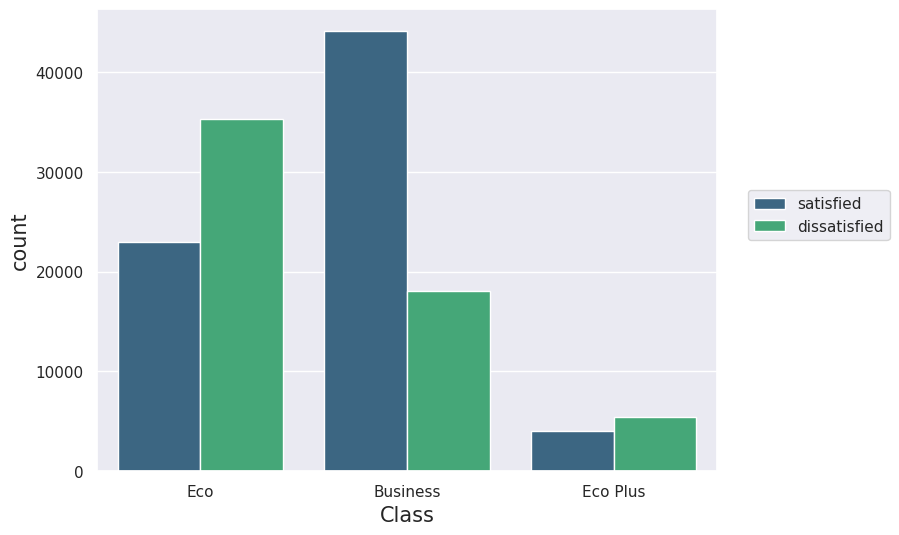

In [ ]:
sns.set(rc={'figure.figsize':(8, 8),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical[:-1]:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue ='satisfaction', palette='viridis')
    plt.legend(loc=(1.05, 0.5))

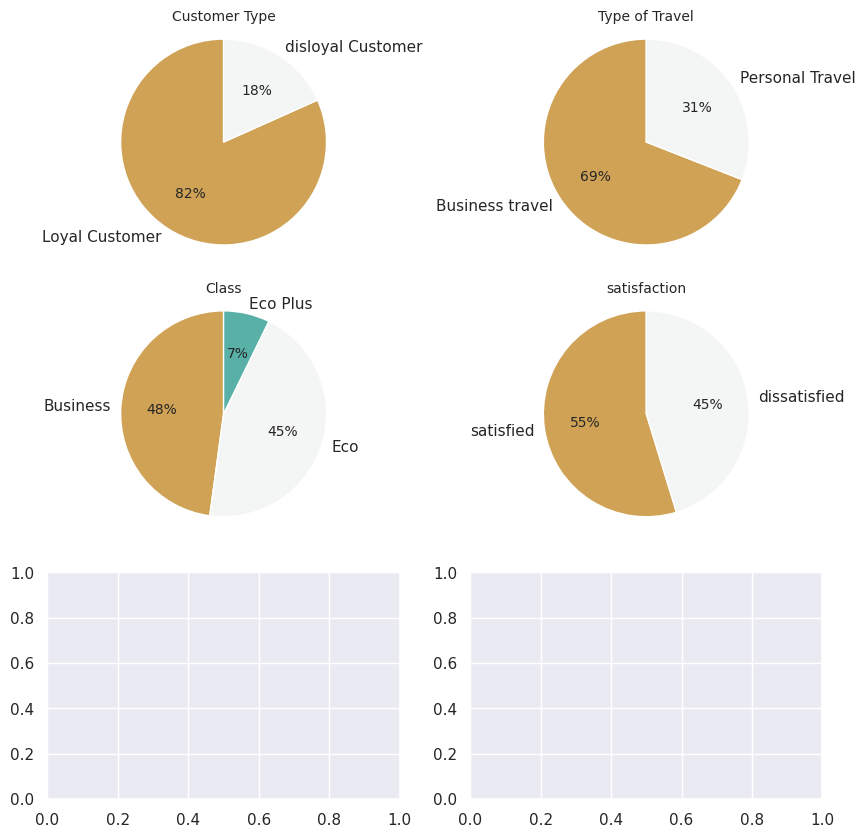

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
for i, col in enumerate(categorical):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("BrBG", 3),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

In [ ]:
df.groupby('satisfaction')['Departure Delay in Minutes'].mean()

,Departure Delay in Minutes
satisfaction,
dissatisfied,17.807749
satisfied,12.154768


In [ ]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

,Arrival Delay in Minutes
satisfaction,
dissatisfied,18.445427
satisfied,12.233503


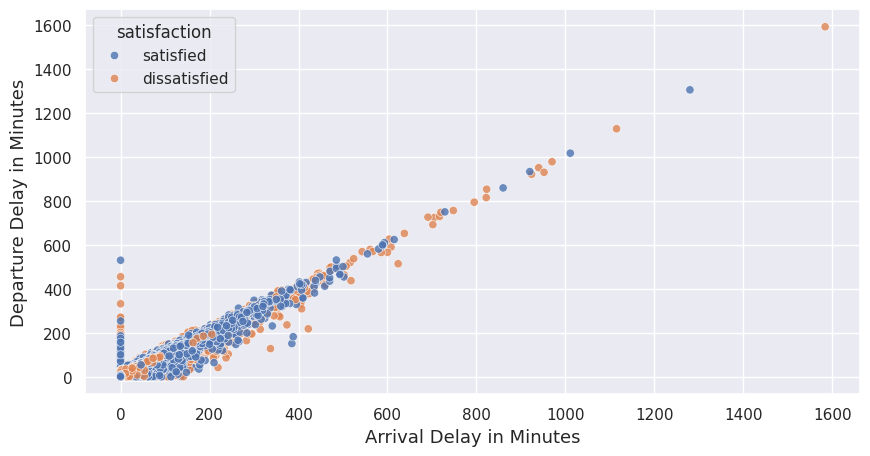

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=df, x='Arrival Delay in Minutes', y='Departure Delay in Minutes', hue='satisfaction', alpha=0.8);

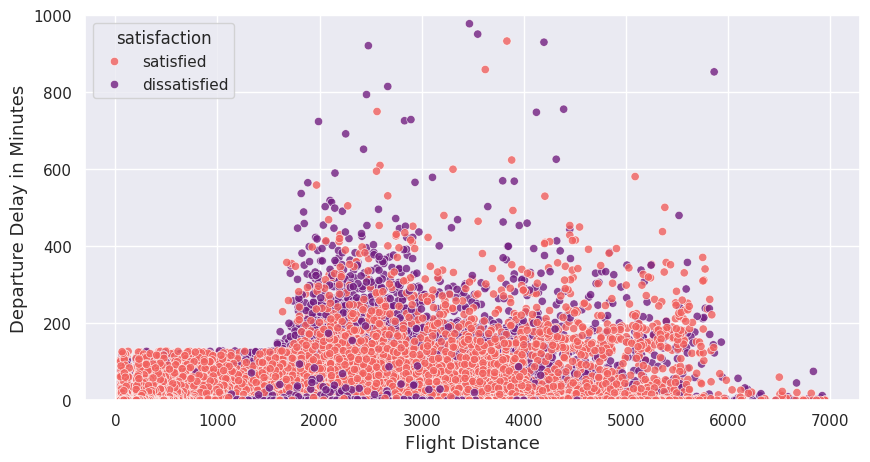

In [ ]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction', palette='magma_r', alpha=0.8)
plt.ylim(0,1000);

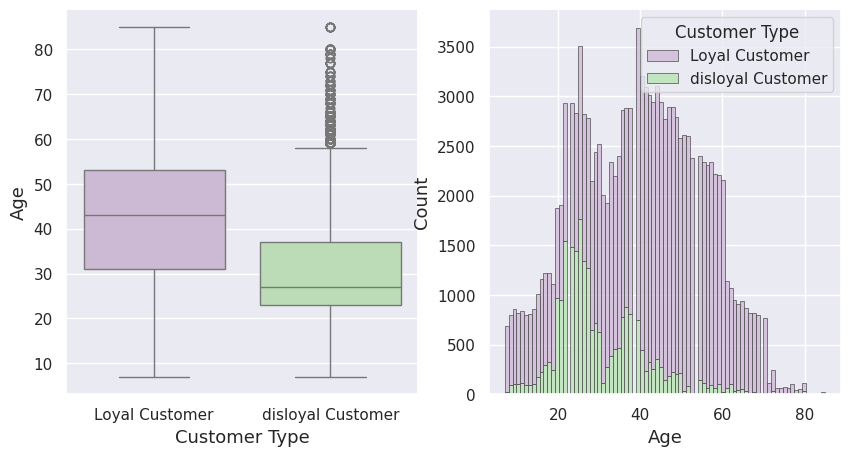

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "PRGn", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "PRGn", edgecolor = ".3",
             linewidth = .5, ax = ax[1]);

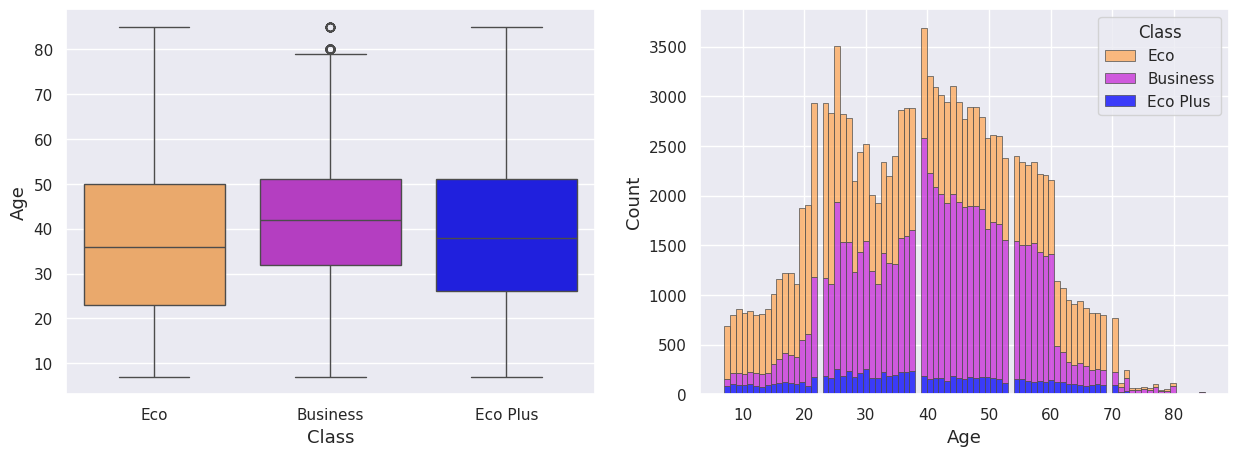

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3",
             linewidth = .5, ax = ax[1]);

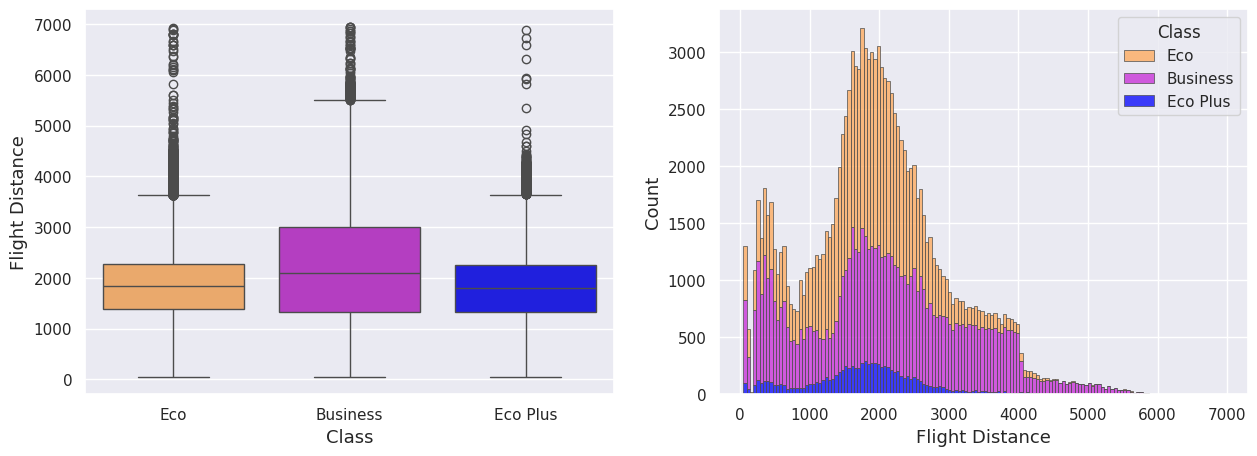

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3",
             linewidth = .5, ax = ax[1]);

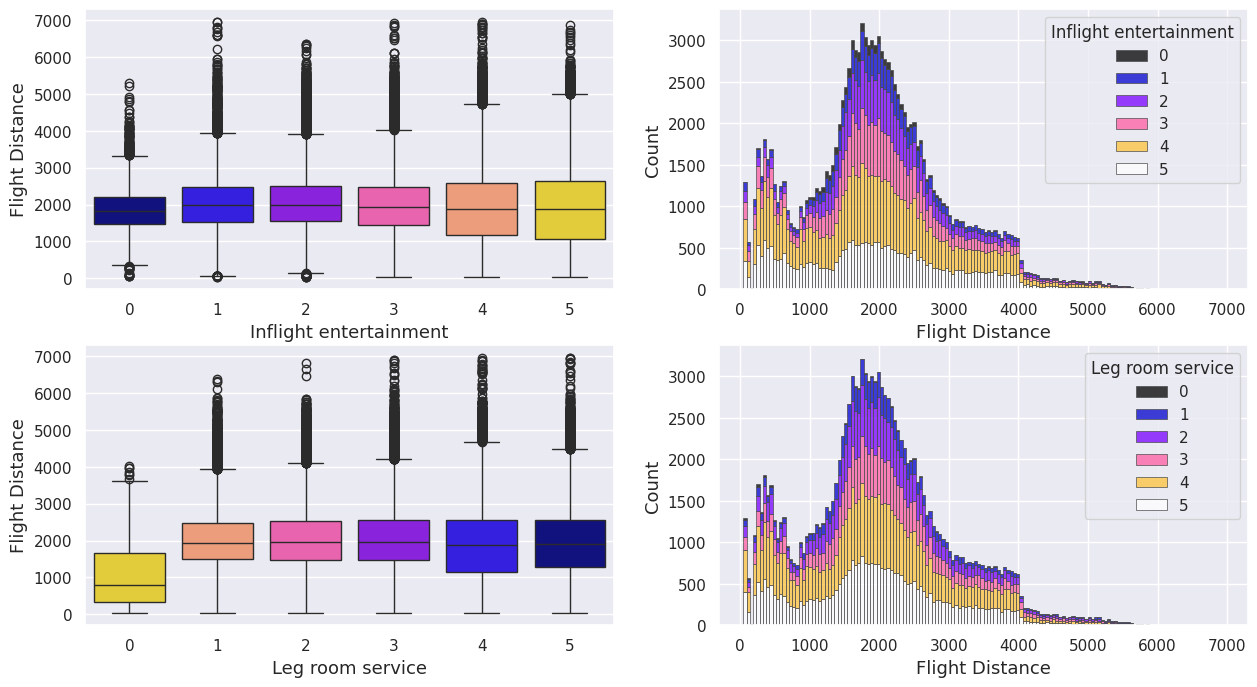

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "gnuplot2", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "gnuplot2",
             edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "gnuplot2",
             edgecolor = ".3", linewidth = .5, ax = ax[1, 1]);

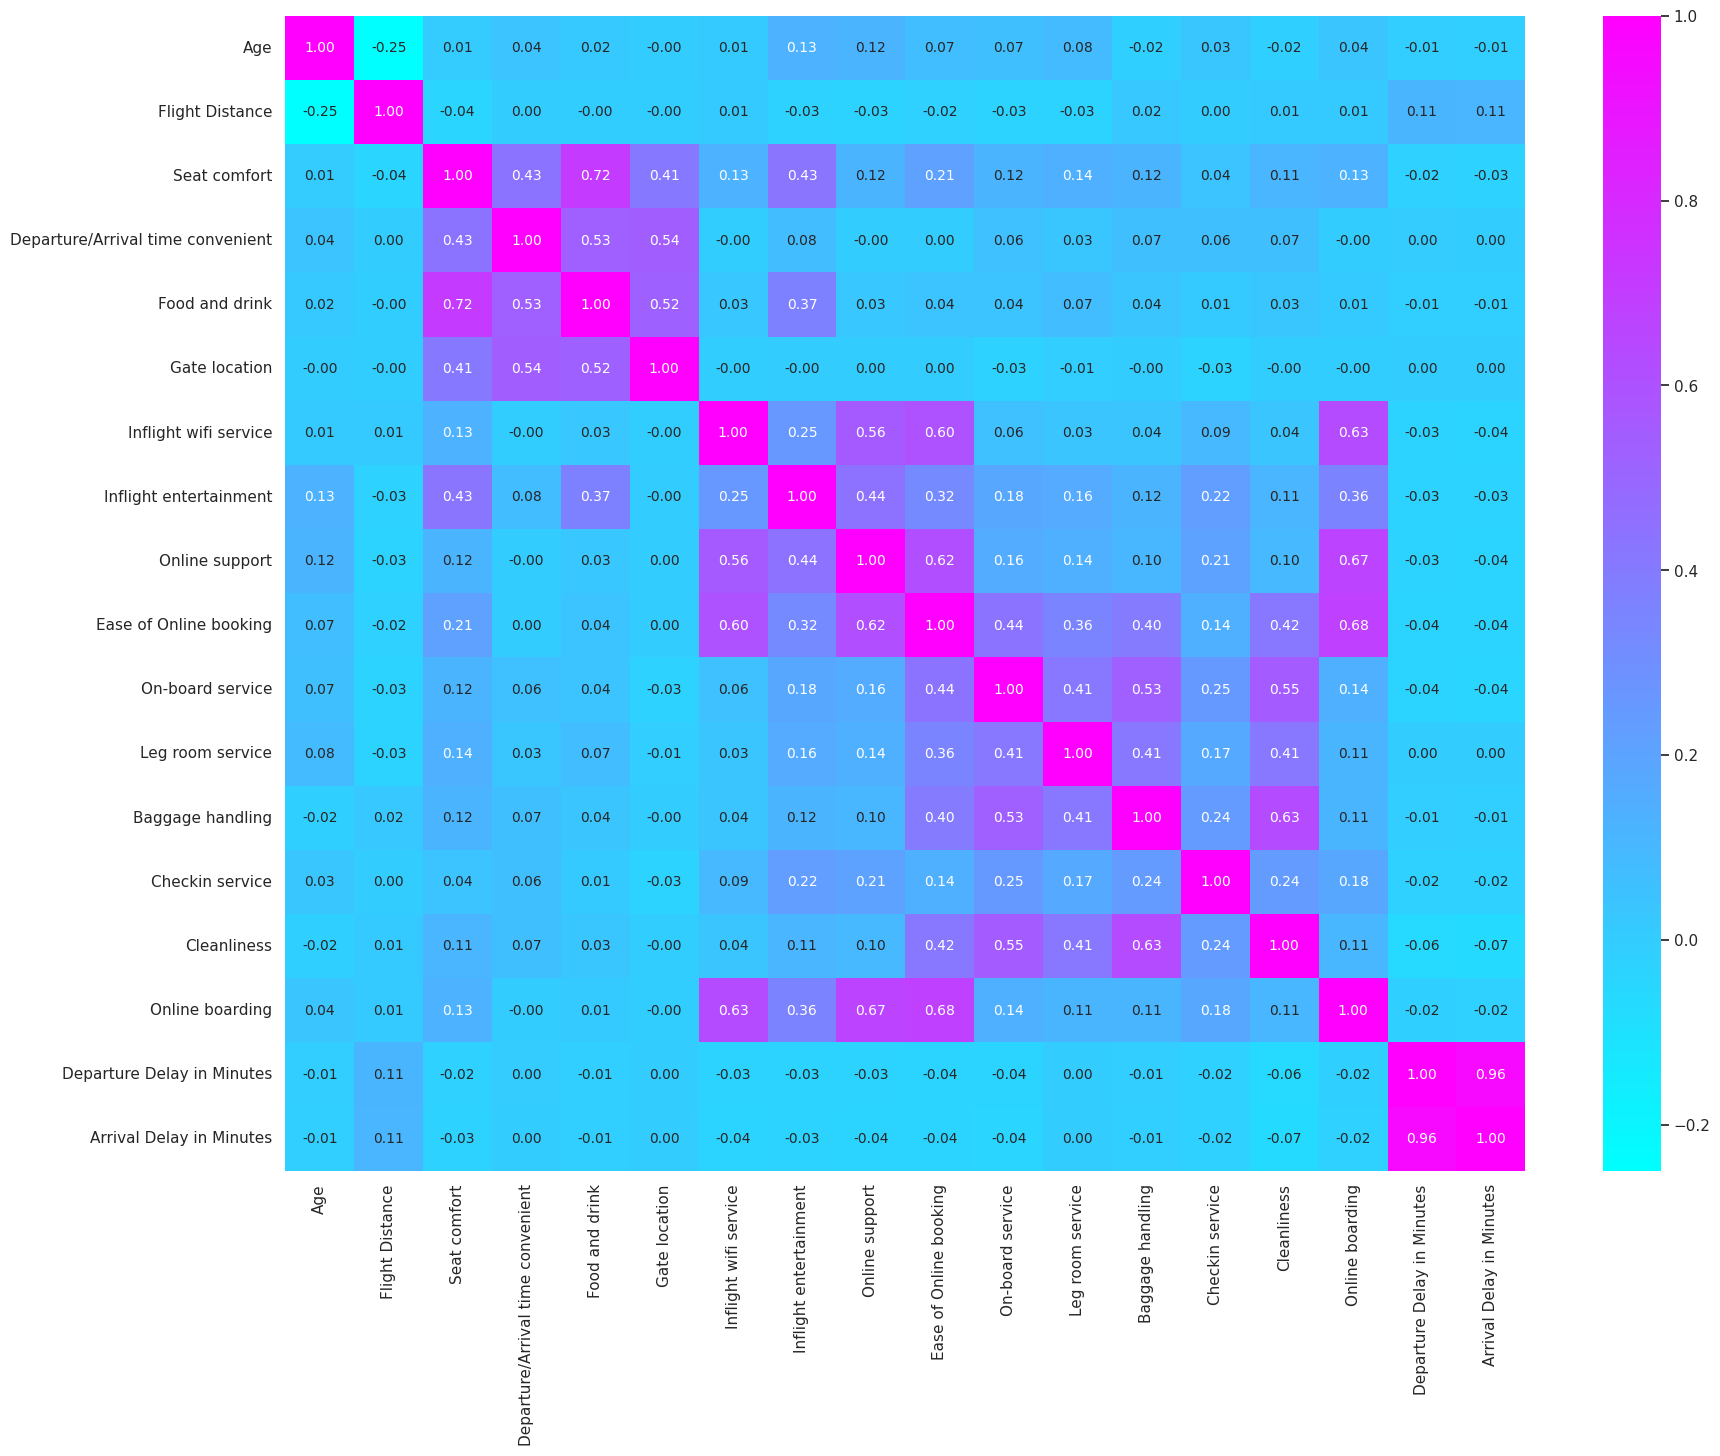

In [ ]:
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()

plt.figure(figsize = (20, 15))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'cool');  # Remove extra quotes around 'bright'

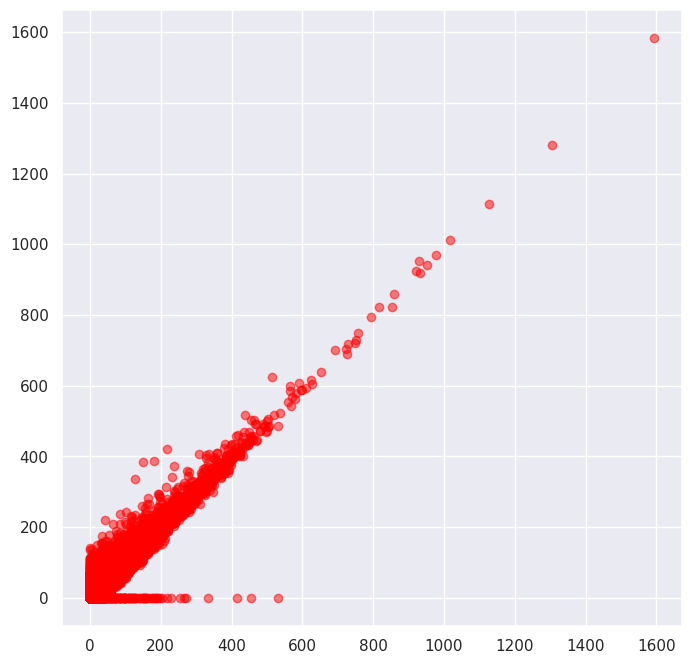

In [ ]:
plt.scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], alpha = 0.5, color = 'red')
pass;

In [ ]:
df["satisfaction"].value_counts()

,count
satisfaction,
satisfied,71087
dissatisfied,58793


In [ ]:
round(df["satisfaction"].value_counts()[1]/(df["satisfaction"].value_counts()[0]+df["satisfaction"].value_counts()[1])*100,2)

45.27

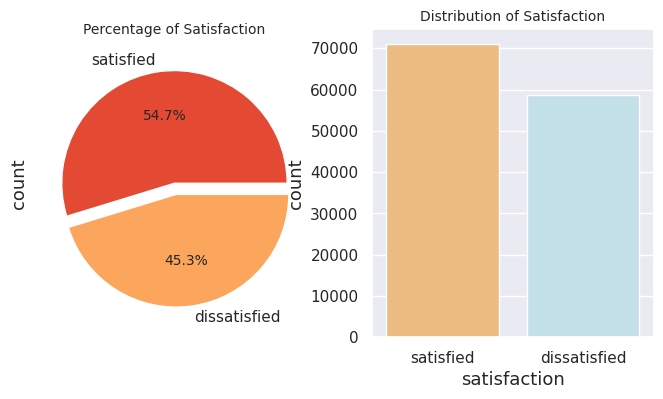

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
df['satisfaction'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Satisfaction')
sns.countplot(x='satisfaction',data=df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Satisfaction')
plt.show();

In [ ]:
def categoricals_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [ ]:
categoricals_unique(df)

satisfaction : ['satisfied' 'dissatisfied']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco' 'Business' 'Eco Plus']


In [ ]:
for i in df.columns:
    if df[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df[i]=label_encoder.fit_transform(df[i])

In [ ]:
df['Class'].unique()

array([1, 0, 2])

In [ ]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,65,1,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1,0,47,1,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1,0,15,1,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1,0,60,1,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1,0,70,1,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  int64  
 1   Customer Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [ ]:
feature = df.drop(columns = 'satisfaction')
target = df[['satisfaction']]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)

In [ ]:
feature_train.shape

(103904, 21)

In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 2.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import lightgbm as lgb

In [ ]:
classification = lgb.LGBMClassifier()
classification.fit(feature_train, target_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 56786, number of negative: 47118
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 932
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546524 -> initscore=0.186635
[LightGBM] [Info] Start training from score 0.186635


LGBMClassifier()

In [ ]:
# predict the results
target_pred = classification.predict(feature_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_pred, target_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred)))

LightGBM Model accuracy score: 0.9530


In [ ]:
target_pred_train = classification.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train)))

Training-set accuracy score: 0.9549


In [ ]:
print('Training set score: {:.4f}'.format(classification.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(classification.score(feature_test, target_test)))

Training set score: 0.9549
Test set score: 0.9530


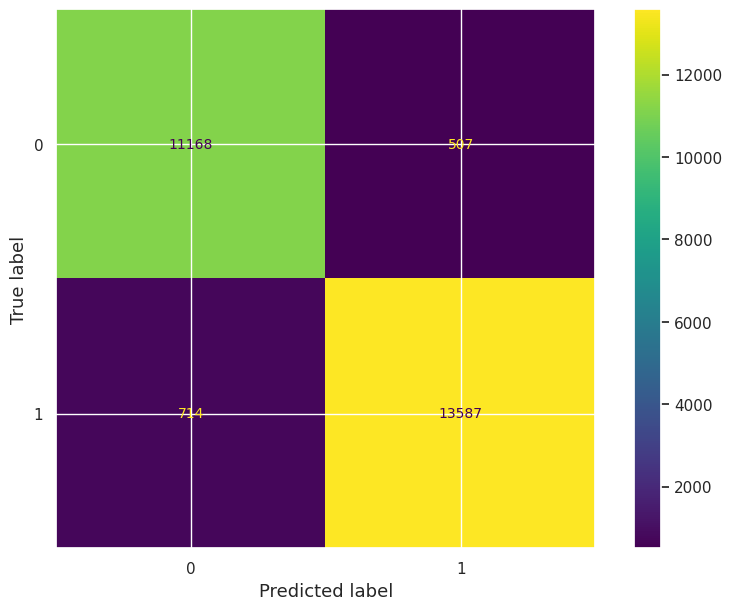

In [ ]:
# Matrix confusion:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11675
           1       0.96      0.95      0.96     14301

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(feature_train, target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# predict the results
target_pred1 = xgb.predict(feature_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(target_pred1, target_test)
print('XGBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred1)))

XGBClassifier Model accuracy score: 0.9572


In [ ]:
target_pred_train1 = xgb.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train1)))

Training-set accuracy score: 0.9683


In [ ]:
from xgboost import XGBClassifier

#fit the model
xgb = XGBClassifier()
xgb.fit(feature_train, target_train)

# prediction
pred_train = xgb.predict(feature_train)

# model name
model_name = str(type(xgb)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(target_train, pred_train,
                                    target_names=['dissatisfied', 'satisfied']))

print("Accuracy score for training dataset",accuracy_score(target_train, pred_train))

		XGBCLASSIFIER MODEL

Training part:
              precision    recall  f1-score   support

dissatisfied       0.96      0.97      0.97     47118
   satisfied       0.98      0.96      0.97     56786

    accuracy                           0.97    103904
   macro avg       0.97      0.97      0.97    103904
weighted avg       0.97      0.97      0.97    103904

Accuracy score for training dataset 0.968326532183554


In [ ]:
print('Training set score: {:.4f}'.format(xgb.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(xgb.score(feature_test, target_test)))

Training set score: 0.9683
Test set score: 0.9572


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
feature_train.isnull().sum()

,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0
Inflight wifi service,0


In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(feature_train, target_train)

RandomForestClassifier(random_state=0)

In [ ]:
rfc.score(feature_test, target_test)

0.9564598090545119

In [ ]:
target_pred2 = rfc.predict(feature_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(target_pred2, target_test)
print('RandomForestClassifier Model accuracy score : {0:0.4f}'. format(accuracy_score(target_test, target_pred2)))

RandomForestClassifier Model accuracy score : 0.9565


In [ ]:
target_pred_train2 = rfc.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train2)))

Training-set accuracy score: 1.0000


In [ ]:
print('Training set score: {:.4f}'.format(rfc.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(rfc.score(feature_test, target_test)))

Training set score: 1.0000
Test set score: 0.9565


In [ ]:
target_test

,satisfaction
103044,1
43282,0
65543,1
65083,1
76496,0
...,...
121239,1
6010,1
101127,1
82323,1


In [ ]:
feature_test

,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
103044,0,59,0,0,1470,4,4,4,4,5,4,4,4,4,4,4,5,4,3,7,0.0
43282,1,22,0,1,1771,1,1,1,4,4,1,5,4,3,4,3,1,4,4,0,0.0
65543,0,55,0,0,3657,0,5,0,2,4,5,4,4,4,4,4,3,4,3,12,8.0
65083,0,41,0,0,1796,0,4,0,1,2,4,5,3,3,3,3,5,3,3,0,0.0
76496,0,42,0,1,1709,2,3,3,3,2,2,2,2,4,4,4,1,3,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121239,0,31,0,0,2015,4,4,4,4,5,5,5,5,4,2,4,4,5,5,14,1.0
6010,0,24,1,1,1912,4,4,4,4,4,5,5,2,2,3,2,3,2,3,72,56.0
101127,0,37,0,1,1361,4,4,4,4,4,4,4,4,4,3,3,5,1,4,0,0.0
82323,0,22,0,0,4466,3,3,3,3,3,3,3,3,1,4,3,2,5,3,0,0.0
